# Cleaning Data/EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


%matplotlib inline

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
def noval(col):
    print((col).isnull().sum())

In [5]:
noval(train['Lot Frontage'])

330


In [6]:
train['Lot Frontage'].fillna(0, inplace=True)
#filling NA's in this numerical column with 0

In [7]:
noval(train['Lot Area'])

0


In [8]:
train['Alley'].fillna('No Access', inplace=True)
train['Alley'].value_counts()
#data description states "NA" values indicate no alley access, so I replace those blanks with "No Access"

No Access    1911
Grvl           85
Pave           55
Name: Alley, dtype: int64

In [9]:
train['Condition 2'].value_counts()

Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

In [10]:
train['Conditions']= train['Condition 1'].str.cat(train['Condition 2'], sep=",")
#Condition 1 and Condition 2 deal with the same values; I combined into one column (separating vals with a comma) for ease/to prevent future high multicollinearity

In [11]:
noval(train['Mas Vnr Type'])

22


In [12]:
noval(train['Mas Vnr Area'])

22


In [13]:
#making sure the 22 null rows match up with respective columns;
#rather than get rid of them, I'll replace them with relevant assumed values
(train[train['Mas Vnr Type'].isnull()]).index & (train[train['Mas Vnr Area'].isnull()]).index

Int64Index([  22,   41,   86,  212,  276,  338,  431,  451,  591,  844,  913,
             939, 1025, 1244, 1306, 1430, 1434, 1606, 1699, 1815, 1820, 1941],
           dtype='int64')

In [14]:
train['Mas Vnr Type'].fillna('None', inplace=True)
train['Mas Vnr Area'].fillna(0, inplace=True)

In [15]:
(train[train['Bsmt Cond'].isnull()].index) & (train[train['Bsmt Qual'].isnull()].index) & (train[train['Bsmt Exposure'].isnull()].index)

Int64Index([  12,   93,  114,  146,  183,  240,  249,  256,  390,  437,  485,
             499,  514,  580,  581,  616,  635,  642,  696,  700,  737,  772,
             790,  794,  924,  933,  954, 1007, 1022, 1049, 1089, 1098, 1125,
            1157, 1211, 1222, 1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428,
            1481, 1594, 1620, 1681, 1684, 1686, 1859, 1875, 1889, 1933, 2010],
           dtype='int64')

In [16]:
#there are more null vals in 'Bsmt Exposure'
#after identifying indexes that do not match; replacing those appropriately
(train[train['Bsmt Exposure'].isnull()].index)

Int64Index([  12,   93,  114,  146,  183,  240,  249,  256,  390,  437,  485,
             499,  514,  580,  581,  616,  635,  642,  696,  700,  737,  772,
             790,  794,  924,  933,  954, 1007, 1022, 1049, 1089, 1098, 1125,
            1157, 1211, 1222, 1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428,
            1456, 1481, 1547, 1594, 1620, 1681, 1684, 1686, 1859, 1875, 1889,
            1933, 1997, 2010],
           dtype='int64')

In [17]:
train.loc[1997, 'Bsmt Exposure']='No'
train.loc[1547, 'Bsmt Exposure']='No'
train.loc[1456, 'Bsmt Exposure']='No'

In [18]:
#'NB' for no basement
train['Bsmt Qual'].fillna('NB', inplace=True)
train['Bsmt Cond'].fillna('NB', inplace=True)
train['Bsmt Exposure'].fillna('NB', inplace=True)

In [19]:
train['BsmtFin Type 1'].fillna('NB', inplace=True)

In [20]:
train['BsmtFin SF 1'].fillna(0, inplace=True)

In [21]:
train['BsmtFin Type 2'].fillna('NB', inplace=True)

In [22]:
train['BsmtFin SF 2'].fillna(0, inplace=True)

In [23]:
train['Bsmt Unf SF'].fillna(0, inplace=True)

In [24]:
#rename to match pattern of other basement names/easier to call
train.rename(columns ={'Total Bsmt SF': 'Bsmt Total SF'}, inplace=True)
train['Bsmt Total SF'].fillna(0, inplace=True)

In [25]:
train[train['Bsmt Full Bath'].isnull()].index

Int64Index([616, 1327], dtype='int64')

In [26]:
train[train['Bsmt Half Bath'].isnull()].index

Int64Index([616, 1327], dtype='int64')

In [27]:
train.loc[:,'Bsmt Full Bath':'Bsmt Half Bath'] = train.loc[:,'Bsmt Full Bath':'Bsmt Half Bath'].fillna(0, inplace=True)

In [59]:
train['Bsmt Full Bath'].value_counts()

Series([], Name: Bsmt Full Bath, dtype: int64)

In [28]:
#another instance where data descr uses NA to mean no
train['Fireplace Qu'].fillna('NFP', inplace=True)

In [29]:
#Na = no garage
train['Garage Type'].fillna('NG',inplace=True)

In [30]:
train['Garage Yr Blt'].fillna(0,inplace=True)

In [31]:
train['Garage Finish'].fillna('NG',inplace=True)

In [32]:
train[train['Garage Cars'].isnull()].index

Int64Index([1712], dtype='int64')

In [33]:
#The null value in 'garage cars' corresponds to a instance where 'garage type' is full but other garage variables are also empty
#Therefore, I am dropping the row
train.drop(train.index[1712], inplace=True)

In [34]:
train.loc[:,'Garage Qual':'Garage Cond'] = train.loc[:,'Garage Qual':'Garage Cond'].fillna('NG', inplace=True)

In [ ]:
#NAs in 'Pool Qual' correspond with 0's in Pool sq ft; therefore, filling as 'NP', no pool

In [35]:
train['Pool QC'].fillna('NP', inplace=True)

In [37]:
train['Fence'].fillna('NF', inplace=True)

In [38]:
train['Misc Feature'].fillna('None', inplace=True)

In [39]:
train['Mo/Yr Sold']= (train['Mo Sold'].map(str)).str.cat((train['Yr Sold'].map(str)), sep="-")


# Plots to identify correlations and outliers & decide on course of action

In [40]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,...,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,1473.661463,7.134941e+08,57.002439,57.948293,10065.698537,6.112683,5.561951,1971.732683,1984.182927,98.674634,...,93.794634,47.580000,22.479512,2.592683,16.519512,2.399024,51.599512,6.221463,2007.776098,181484.609268
std,844.018399,1.886879e+08,42.833710,33.144952,6744.097442,1.426407,1.104724,30.166057,21.038838,174.353604,...,128.568578,66.755256,59.713182,25.235706,57.387043,37.791752,573.532756,2.744483,1.312222,79275.121591
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.250000,5.284581e+08,20.000000,43.250000,7500.000000,5.000000,5.000000,1954.000000,1964.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129812.500000
50%,1483.500000,5.354532e+08,50.000000,63.000000,9432.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2196.500000,9.071790e+08,70.000000,78.000000,11514.250000,7.000000,6.000000,2001.000000,2004.000000,159.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


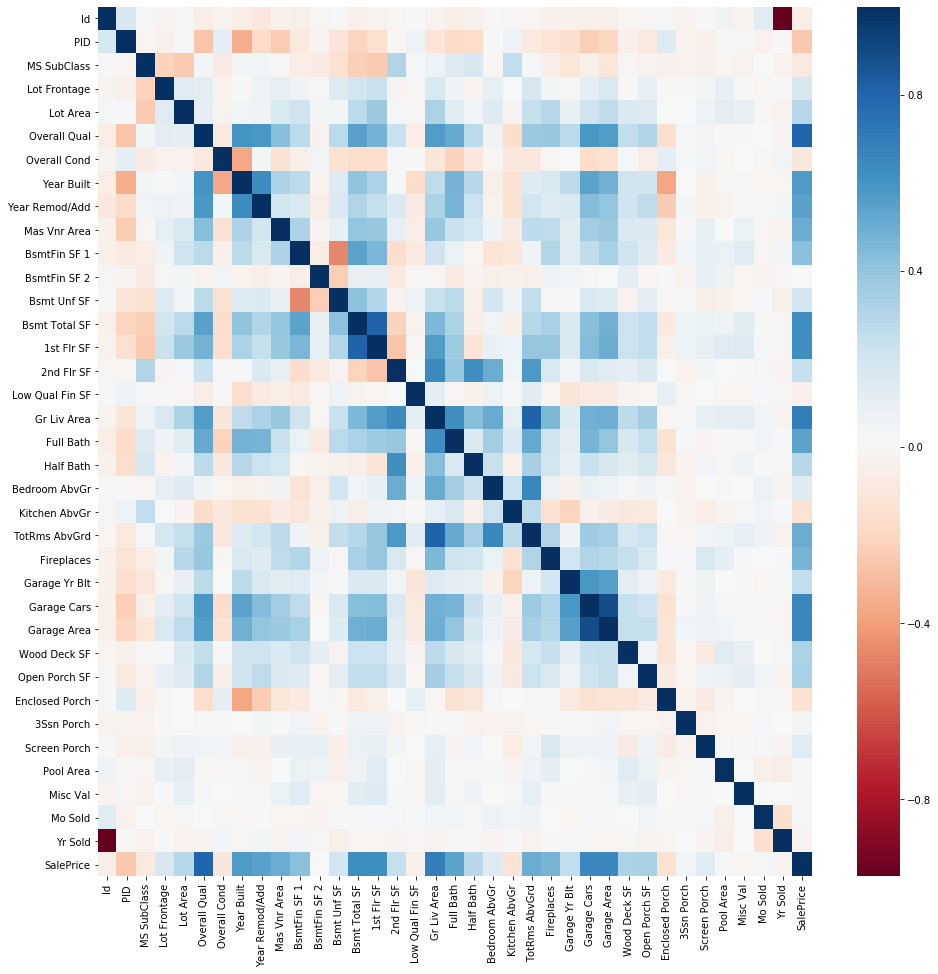

In [41]:
plt.figure(figsize= (16,16))
sns.heatmap(train.corr(),cmap='RdBu');

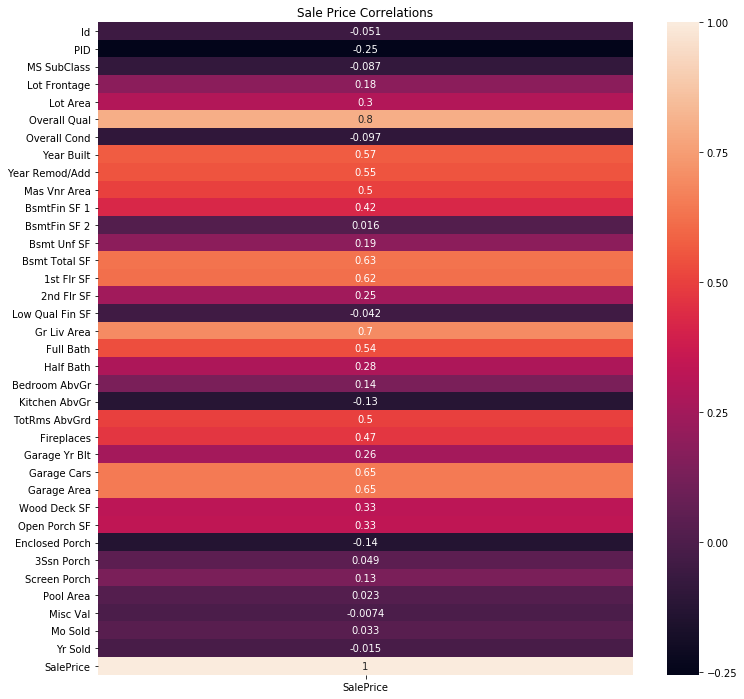

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr()[['SalePrice']], annot=True)
plt.title('Sale Price Correlations');

#### From the above heatmaps, we can see which variables are most closely correlated with sale price and each other:
                                 * Overall Quality
                                 * Gr Liv Area (Above Ground Living Area SF)
                                 * Garage Cars/Garage Area
                                 * 1st Fl SF
                                 * Bsmt Total SF
                                 * Full Baths

With this information, I can identify other variables correlated with these to expand/play around with the variables of my models.

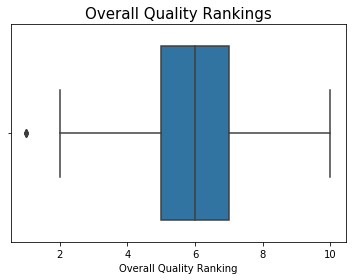

In [43]:
sns.boxplot(train['Overall Qual'])
plt.title('Overall Quality Rankings', size=15)
plt.xlabel('Overall Quality Ranking');

The clear outliers here are properties with overall quality values below 2. <br>
There are only 4 instances of these super low scores. <br> Therefore, I think it is prudent to remove these as they may unnecessarily skew my model results.

In [44]:
train['Overall Qual'].value_counts()

5     562
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

In [45]:
train = train[train['Overall Qual'] != 1]

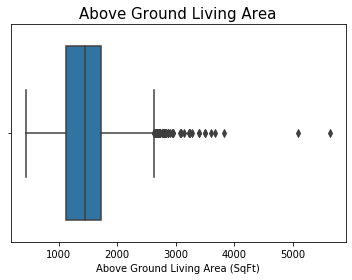

In [46]:
sns.boxplot(train['Gr Liv Area'])
plt.title('Above Ground Living Area', size=15)
plt.xlabel('Above Ground Living Area (SqFt)');

In [47]:
(train['Gr Liv Area']>=3000).value_counts()

False    2029
True       17
Name: Gr Liv Area, dtype: int64

Homes with an above ground living area square footage of over 3000sqft represent less than 1% of all homes. <br>
Rather than remove them, I will create a separate column for these 'larger area' homes.

In [48]:
train['Larger Gr Liv Area'] = ((train['Gr Liv Area']>=3000)==True)

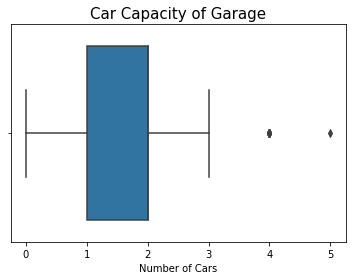

In [49]:
sns.boxplot(train['Garage Cars'])
plt.title('Car Capacity of Garage', size=15)
plt.xlabel('Number of Cars');

The clear outliers here are garages with car capacities of 4 & 5. <br> There is only 1 garage that accomodates 5 cars, and it does not fall into the 'Larger Gr Living Area' column (as would be expected as ground living area sqft and garage car capacities are otherwise correlated columns). <br> 
We can conclude it is an anomaly and not of benefit to my models. It will be removed.

In [50]:
train['Garage Cars'].value_counts()

2.0    1135
1.0     523
3.0     263
0.0     111
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [51]:
(train[(train['Garage Cars']==5) & (train['Larger Gr Liv Area'])==True])

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Conditions,Mo/Yr Sold,Larger Gr Liv Area


In [52]:
train = train[train['Garage Cars'] != 5]

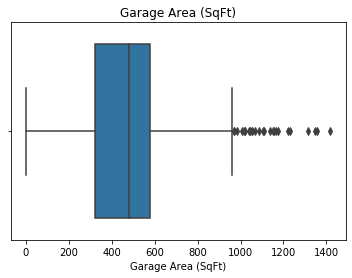

In [53]:
sns.boxplot(train['Garage Area'])
plt.title('Garage Area (SqFt)')
plt.xlabel('Garage Area (SqFt)');

Homes with garage areas over 1000 SqFt are rare, and only 1 contains a garage over 1400, an anomaly. <br> I will drop this row.

In [54]:
(train['Garage Area']>1000).value_counts()

False    2023
True       22
Name: Garage Area, dtype: int64

In [55]:
(train[train['Garage Area']>1400]).index

Int64Index([960], dtype='int64')

In [56]:
train.drop([960],inplace=True)

Due to the clear relationship between the 'Garage Area' & 'Garage Cars' columns, I will create an interaction term of the two.

In [ ]:
train['Garage Cars * Area'] = train['Garage Area'] * train['Garage Cars']

In [ ]:
sns.boxplot(train['1st Flr SF'])
plt.title('1st Floor Total SqFt', size=15)
plt.xlabel('Square Feet');

Of these outlier home sizes, there is only one home with a square footage over 5000 , one home with a square footage over 4000 , and one with a square footage over 3000. <br> These I will remove from my dataset. <br>The homes with square footage over 2000 mostly also appear in the variable 'Larger Gr Liv Area' I created to represent homes with an overall sqft living area over the max 3000.

In [ ]:
(train['1st Flr SF']>2000).value_counts()

In [ ]:
(train[(train['1st Flr SF']>2000) & (train['Larger Gr Liv Area']==True)])

In [ ]:
train = train[train['1st Flr SF'] <3000]

In [ ]:
sns.boxplot(train['Bsmt Total SF'])
plt.title('Total Basement Area (Finished&Unfinished)', size=15)
plt.xlabel('Square Feet');

There are only 2 houses wherein the total SF of the basement is greater than 3000. <br>
I am creating a new column that uses 1 to denote if a house's finished square footage is greater than half of the total basement square footage (0 if not). <br>
My assumption is that because total basement sq footage is positively correlated with sale price, the larger the basement, the more the house is worth; the more finished square footage of the basement, the higher the sale price.

In [ ]:
LgFin = []
for index, row in train.iterrows():
    if (row['BsmtFin SF 1']+ row['BsmtFin SF 2'])>(row['Bsmt Total SF']/2):
        LgFin.append(1)
    else:
        LgFin.append(0)

In [ ]:
train['Over 50%Fin Bsmt'] = LgFin

In [ ]:
#removing these columns because I have already made a combo column with the values
train.drop(['Mo Sold', 'Yr Sold'], axis=1, inplace=True)

In [ ]:
#same reasoning as above
train.drop(['Garage Cars', 'Garage Area'], axis=1, inplace=True)

In [ ]:
train['BsmtFin SF'] = train['BsmtFin SF 1'] + train['BsmtFin SF 2']

#### Saving my cleaned data to a new csv

In [ ]:
train.to_csv('../datasets/cleaned_training_data')

#### A revised heatmap with my cleaned data

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr()[['SalePrice']], annot=True)
plt.title('Sale Price Correlations');

# Next Steps

### After cleaning my data and performing the necessary functions on variables, I am ready to begin creating and testing out a few models.

### I have chosen to:
                    * combine columns with similar or highly related variables
                    * eliminate columns I felt were redundant (after doing the above)
                    * eliminated outliers that appeared in quantities under 10
                    * kept outliers that appeared in quantities over 10 because eliminating too many outliers may cause one or multiple iterations of my model to be overfit later on
                    * create new columns for outlier variables I think will be significant in determining my target later
                    